# Instagram Reach Analysis


I have been researching Instagram reach for a long time now. Every time I post on my Instagram account, I collect data on how well the post reach after a week. That helps in understanding how Instagram’s algorithm is working. If you want to analyze the reach of your Instagram account, you have to collect your data manually as there are some APIs, but they don’t work well. So it’s better to collect your Instagram data manually.

If you are a data science student and want to learn Instagram reach analysis using Python, you can use the data I have collected from my Instagram account. You can download the dataset I have used for the task of Instagram reach analysis from here. Now in the section below, I will take you through the task of Instagram Reach Analysis and Prediction with Machine Learning using Python.

Now let’s start the task of analyzing the reach of my Instagram account by importing the necessary Python libraries and the dataset:

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import PassiveAggressiveRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Instagram data.csv',encoding='latin')
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


Let’s have a look at the insights of the columns to understand the data type of all the columns

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


Before starting everything, let’s have a look at whether this dataset contains any null values or not:

In [ ]:
df.isnull().sum()

### Analyzing the instagram reach

Now let’s start with analyzing the reach of my Instagram posts. I will first have a look at the distribution of impressions I have received from home

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title('Distribution of impression from Home')
sns.distplot(df['From Home'])
plt.show()

The impressions I get from the home section on Instagram shows how much my posts reach my followers. Looking at the impressions from home, I can say it’s hard to reach all my followers daily. Now let’s have a look at the distribution of the impressions I received from hashtags:

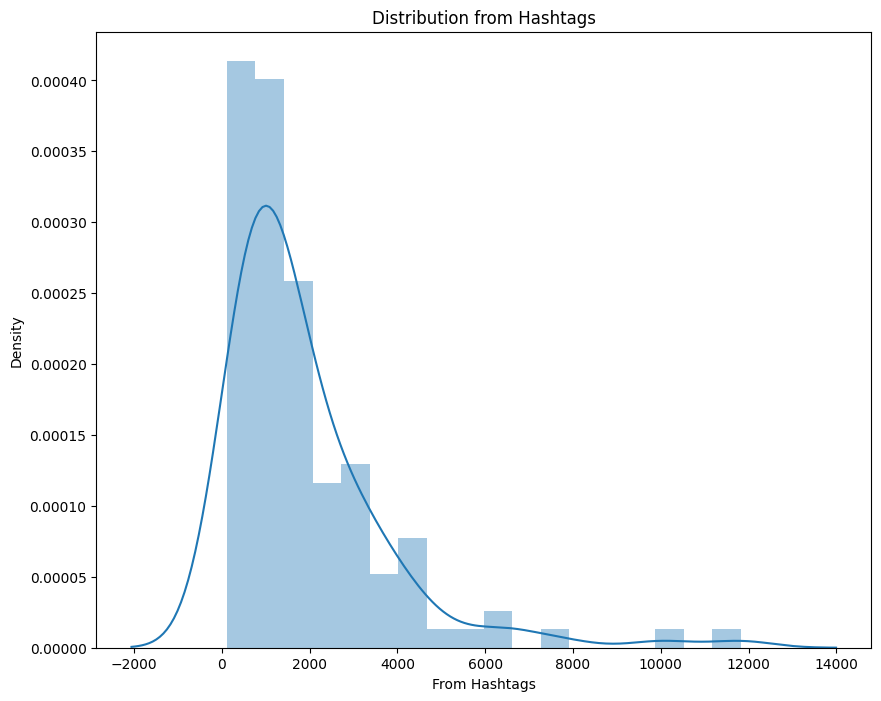

In [20]:
plt.figure(figsize=(10,8))
plt.title('Distribution from Hashtags')
sns.distplot(df['From Hashtags'])
plt.show()

Hashtags are tools we use to categorize our posts on Instagram so that we can reach more people based on the kind of content we are creating. Looking at hashtag impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags. Now let’s have a look at the distribution of impressions I have received from the explore section of Instagram:

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Impression from Explore')
sns.distplot(df['From Explore'])
plt.show()

The explore section of Instagram is the recommendation system of Instagram. It recommends posts to the users based on their preferences and interests. By looking at the impressions I have received from the explore section, I can say that Instagram does not recommend our posts much to the users. Some posts have received a good reach from the explore section, but it’s still very low compared to the reach I receive from hashtags.

Now let’s have a look at the percentage of impressions I get from various sources on Instagram:

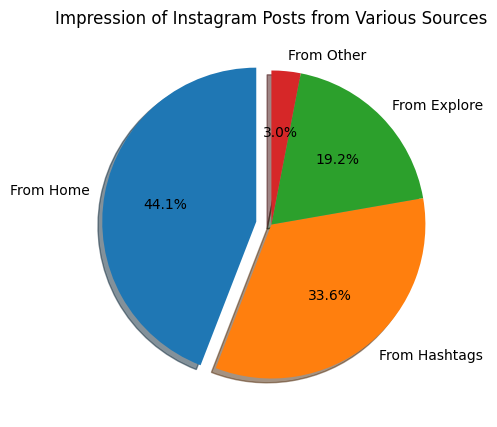

In [32]:
fig = plt.figure(figsize=(8, 5))
plt.title('Impression of Instagram Posts from Various Sources')
values = [df['From Home'].sum(), df['From Hashtags'].sum(), df['From Explore'].sum(), df['From Other'].sum()]
labels = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
startangle=90
autopct_format = '%1.1f%%'
explode = [0.1, 0, 0, 0]
plt.pie(values, labels=labels,explode=explode,startangle=startangle,autopct=autopct_format,shadow=True)
plt.show()


So the above donut plot shows that almost 50 per cent of the reach is from my followers, 38.1 per cent is from hashtags, 9.14 per cent is from the explore section, and 3.01 per cent is from other sources.



## Let's analyze the relationship

Now let’s analyze relationships to find the most important factors of our Instagram reach. It will also help us in understanding how the Instagram algorithm works.

Let’s have a look at the relationship between the number of likes and the number of impressions on my Instagram posts:

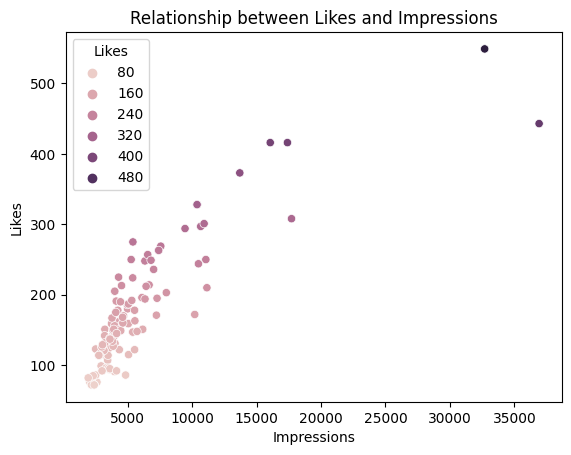

In [42]:
figure = sns.scatterplot(data=df, x='Impressions', y='Likes', hue='Likes')
plt.title('Relationship between Likes and Impressions')
plt.show()


There is a linear relationship between the number of likes and the reach I got on Instagram. Now let’s see the relationship between the number of comments and the number of impressions on my Instagram posts:

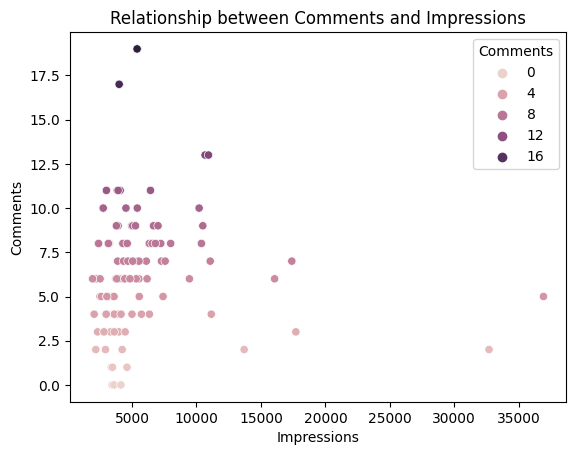

In [43]:
figure = sns.scatterplot(data=df, x='Impressions', y='Comments', hue='Comments')
plt.title('Relationship between Comments and Impressions')
plt.show()


It looks like the number of comments we get on a post doesn’t affect its reach. Now let’s have a look at the relationship between the number of shares and the number of impressions:

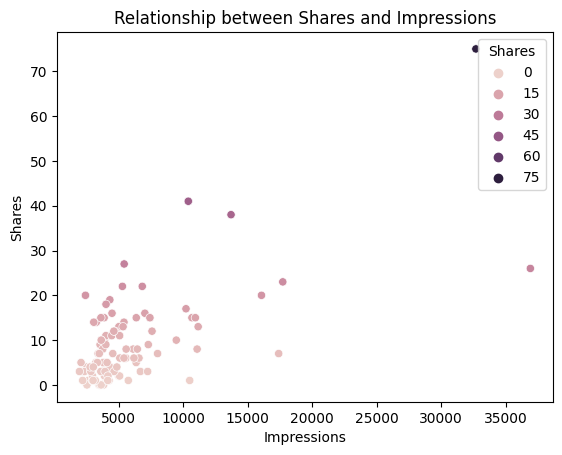

In [45]:
figure = sns.scatterplot(data=df, x='Impressions', y='Shares', hue='Shares')
plt.title('Relationship between Shares and Impressions')
plt.show()

A more number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do. Now let’s have a look at the relationship between the number of saves and the number of impressions:

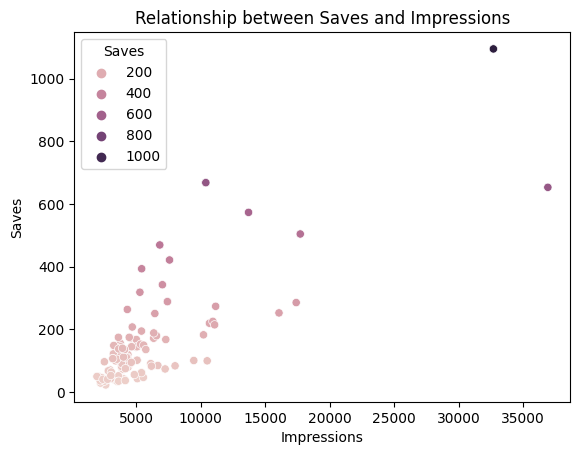

In [46]:
figure = sns.scatterplot(data=df, x='Impressions', y='Saves', hue='Saves')
plt.title('Relationship between Saves and Impressions')
plt.show()

There is a linear relationship between the number of times my post is saved and the reach of my Instagram post. Now let’s have a look at the correlation of all the columns with the Impressions column:

In [47]:
correlation=df.corr()
correlation['Impressions'].sort_values(ascending=False)

Impressions       1.00
From Explore      0.89
Follows           0.89
Likes             0.85
From Home         0.84
Saves             0.78
Profile Visits    0.76
Shares            0.63
From Other        0.59
From Hashtags     0.56
Comments         -0.03
Name: Impressions, dtype: float64

So we can say that more likes and saves will help you get more reach on Instagram. The higher number of shares will also help you get more reach, but a low number of shares will not affect your reach either.

### Analyzing the Conversion Rate

In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post. The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100. Now let’s have a look at the conversation rate of my Instagram account:

In [48]:
conversion_rate=(df['Follows'].sum()/df['Profile Visits'].sum())*100
conversion_rate

41.00265604249668

So the conversation rate of my Instagram account is 41% which sounds like a very good conversation rate. Let’s have a look at the relationship between the total profile visits and the number of followers gained from all profile visits:

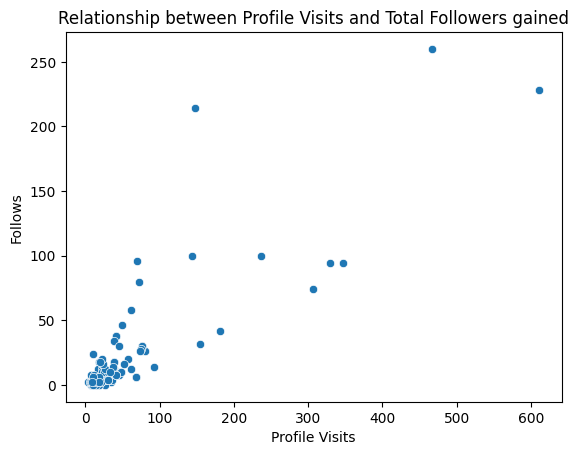

In [49]:
figure = sns.scatterplot(data=df, x='Profile Visits', y='Follows')
plt.title('Relationship between Profile Visits and Total Followers gained')
plt.show()

### Instagram Reach Prediction Model

In [50]:
x=df[['Likes','Saves','Comments',
               'Shares','Profile Visits','Follows']].values

y=df['Impressions'].values

#### STANDARD SCALER METHOD

In [51]:
sc=StandardScaler()

In [52]:
x=sc.fit_transform(x)

#### Splitting the data into training and testing set

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### MODEL BUILDING

In [54]:
reg=LazyRegressor(verbose=0,ignore_warnings=False,custom_metric=None)

In [55]:
models,predictions=reg.fit(x_train,x_test,y_train,y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:01<00:00, 38.66it/s]


In [56]:
model_dictionary = reg.provide_models(x_train, x_test, y_train, y_test)
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,0.95,0.96,1290.69,0.01
RANSACRegressor,0.87,0.91,2020.56,0.03
GammaRegressor,0.86,0.90,2147.41,0.00
PassiveAggressiveRegressor,0.78,0.83,2701.86,0.01
HuberRegressor,0.73,0.80,2945.54,0.02
RidgeCV,0.72,0.79,3024.52,0.00
LarsCV,0.71,0.79,3075.56,0.03
OrthogonalMatchingPursuitCV,0.71,0.78,3093.51,0.02
SGDRegressor,0.70,0.78,3125.68,0.02


In [57]:
PR=PoissonRegressor()

In [58]:
PR.fit(x_train,y_train)

PoissonRegressor()

In [59]:
y_pred=PR.predict(x_test)

In [60]:
output=pd.DataFrame(zip(y,y_pred),columns=('FEATURES','REACH'),dtype=int)
output.head()

,FEATURES,REACH
0,3920,7419
1,5394,4756
2,4021,4038
3,4528,4633
4,2518,4401


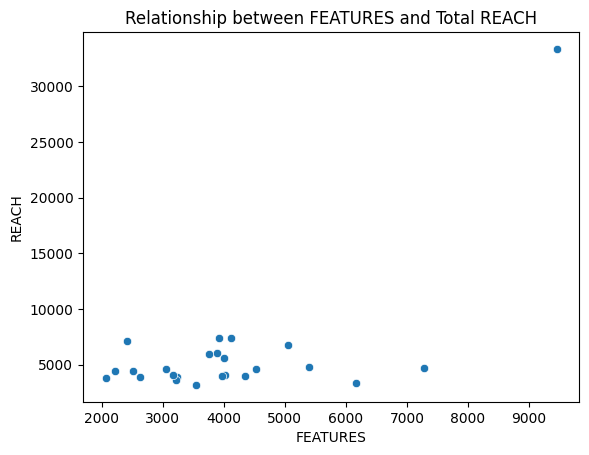

In [61]:
figure = sns.scatterplot(data=output, x='FEATURES', y='REACH')
plt.title('Relationship between FEATURES and Total REACH')
plt.show()

### Another method

Now in this section, I will train a machine learning model to predict the reach of an Instagram post. Let’s split the data into training and test sets before training the model:

In [62]:
x = np.array(df[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(df["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=0)

Now here’s is how we can train a machine learning model to predict the reach of an Instagram post using Python:

In [65]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.7040845231099165

Now let’s predict the reach of an Instagram post by giving inputs to the machine learning model:

In [66]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([8825.60488432])

### SUMMARY

So this is how you can analyze and predict the reach of Instagram posts with machine learning using Python. If a content creator wants to do well on Instagram in a long run, they have to look at the data of their Instagram reach. That is where the use of Data Science in social media comes in. I hope you liked this article on the task of Instagram Reach Analysis using Python